# Minimal Neural Network - Case Study

Notes on the lesson from http://cs231n.github.io/neural-networks-case-study/

## Introduction

First, we generate the datapoints:

In [3]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [4]:
N = 100  # numer of points per class
D = 2  # dimensionality
K = 3  # number of classes
X = np.zeros((N * K, D))  # data matrix (each row is a single example)
y = np.zeros(N * K, dtype='uint8')  # class labels

In [5]:
for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

<IPython.core.display.Javascript object>


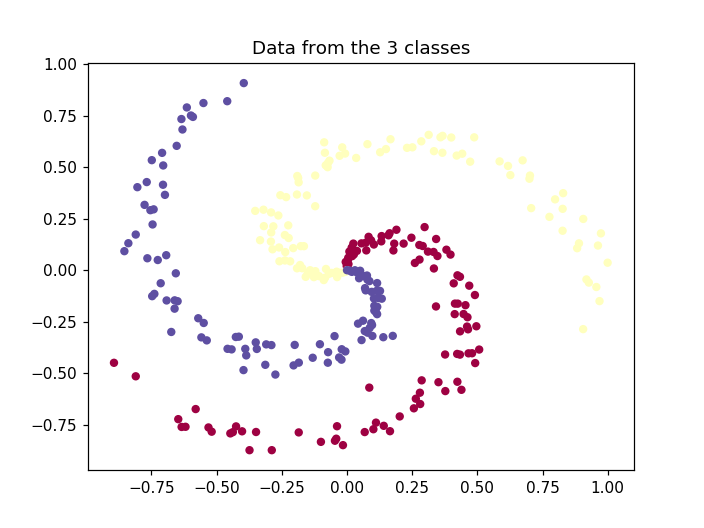

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
plt.title('Data from the 3 classes')

No need to preprocess the dataset, as the features are already in a nice range from -1 to 1.

## Softmax Linear Classifier

We first initialize the parameters (weights and biases):

In [8]:
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

Then compute the class scores:

In [12]:
scores = np.dot(X, W) + b  # size 300x3, each row the score per class

And now the loss. ***I am here right now***

## Neural Network

**TO DO**